In [81]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
from pmdarima import auto_arima
from xgboost import XGBRegressor

In [82]:
Oil_Prices = pd.read_csv("OIl.csv", delimiter=";")
Oil_Prices.head()

,Tanggal,Oil
0,Dec-98,"10,41"
1,Jan-99,"11,44"
2,Feb-99,"10,75"
3,Mar-99,"13,17"
4,Apr-99,"15,87"


In [83]:
Oil_Prices.dtypes

Tanggal    object
Oil        object
dtype: object

In [84]:
Oil_Prices.isnull().sum()


Tanggal    0
Oil        0
dtype: int64

In [85]:
Oil_Prices['Tanggal'] = pd.to_datetime(Oil_Prices['Tanggal'], format='%b-%y')
Oil_Prices['Oil'] = Oil_Prices['Oil'].str.replace(',', '.', regex=False).astype(float)
Oil_Prices.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Oil_Prices.rename(columns={'Oil': 'Harga'}, inplace=True)
Oil_Prices

,Periode,Harga
0,1998-12-01,10.41
1,1999-01-01,11.44
2,1999-02-01,10.75
3,1999-03-01,13.17
4,1999-04-01,15.87
...,...,...
309,2024-09-01,72.42
310,2024-10-01,73.97
311,2024-11-01,72.29
312,2024-12-01,72.31


In [86]:
Inflation = pd.read_csv("Inflation.csv", delimiter=';')
Inflation.head()

,Tanggal,Data
0,Dec-98,1.41 %
1,Jan-99,2.96 %
2,Feb-99,1.27 %
3,Mar-99,-0.19 %
4,Apr-99,-0.67 %


In [87]:
Inflation.dtypes

Tanggal    object
Data       object
dtype: object

In [88]:
Inflation.isnull().sum()

Tanggal    0
Data       0
dtype: int64

In [89]:
Inflation['Tanggal'] = pd.to_datetime(Inflation['Tanggal'], format='%b-%y')
Inflation['Data'] = Inflation['Data'].str.replace(',', '.', regex=False).str.replace('%', '', regex=False).astype(float) / 100
Inflation.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Inflation.rename(columns={'Data': 'Inflation Rate'}, inplace=True)
Inflation


,Periode,Inflation Rate
0,1998-12-01,0.0141
1,1999-01-01,0.0296
2,1999-02-01,0.0127
3,1999-03-01,-0.0019
4,1999-04-01,-0.0067
...,...,...
309,2024-09-01,-0.0012
310,2024-10-01,0.0008
311,2024-11-01,0.0030
312,2024-12-01,0.0044


In [90]:
Exchange_Rate = pd.read_csv("Exchange Rate.csv", delimiter=';')
Exchange_Rate.head()

,Tanggal,Harga (IDR-USD)
0,Dec-98,8000.0
1,Jan-99,8850.0
2,Feb-99,8800.0
3,Mar-99,8650.0
4,Apr-99,8017.5


In [91]:
Exchange_Rate.dtypes

Tanggal             object
Harga (IDR-USD)    float64
dtype: object

In [92]:
Exchange_Rate.isnull().sum()

Tanggal            0
Harga (IDR-USD)    0
dtype: int64

In [93]:
Exchange_Rate['Tanggal'] = pd.to_datetime(Exchange_Rate['Tanggal'], format='%b-%y')
Exchange_Rate.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Exchange_Rate

,Periode,Harga (IDR-USD)
0,1998-12-01,8000.0
1,1999-01-01,8850.0
2,1999-02-01,8800.0
3,1999-03-01,8650.0
4,1999-04-01,8017.5
...,...,...
309,2024-09-01,15135.0
310,2024-10-01,15690.0
311,2024-11-01,15840.0
312,2024-12-01,16090.0


In [94]:
Interest_Rate = pd.read_csv("BI Rate.csv")
Interest_Rate.head()

,Bulan,BI Rate
0,Dec-98,38.44
1,Jan-99,36.43
2,Feb-99,37.50
3,Mar-99,37.84
4,Apr-99,35.19


In [95]:
Interest_Rate.dtypes

Bulan       object
BI Rate    float64
dtype: object

In [96]:
Interest_Rate.isnull().sum()

Bulan      0
BI Rate    0
dtype: int64

In [97]:
Interest_Rate['Bulan'] = pd.to_datetime(Interest_Rate['Bulan'], format='%b-%y')
Interest_Rate.rename(columns={'BI Rate': 'Interest Rate'}, inplace=True)
Interest_Rate.rename(columns={'Bulan': 'Periode'}, inplace=True)
Interest_Rate

,Periode,Interest Rate
0,1998-12-01,38.44
1,1999-01-01,36.43
2,1999-02-01,37.50
3,1999-03-01,37.84
4,1999-04-01,35.19
...,...,...
309,2024-09-01,6.00
310,2024-10-01,6.00
311,2024-11-01,6.00
312,2024-12-01,6.00


In [98]:
Gold_Prices = pd.read_csv("Gold.csv", delimiter=';')
Gold_Prices.head()

,Tanggal,Gold
0,Dec-98,"291,68"
1,Jan-99,"287,08"
2,Feb-99,"287,33"
3,Mar-99,"285,96"
4,Apr-99,"282,62"


In [99]:
Gold_Prices.dtypes

Tanggal    object
Gold       object
dtype: object

In [100]:
Gold_Prices.isnull().sum()

Tanggal    0
Gold       0
dtype: int64

In [101]:
Gold_Prices['Tanggal'] = pd.to_datetime(Gold_Prices['Tanggal'], format='%b-%y')
Gold_Prices['Gold'] = Gold_Prices['Gold'].str.replace(',', '.', regex=False).astype(float)
Gold_Prices.rename(columns={'Gold': 'Harga'}, inplace=True)
Gold_Prices.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Gold_Prices['Gold_Price_Sebelumnya'] = Gold_Prices['Harga'].shift(1)
Gold_Prices

,Periode,Harga,Gold_Price_Sebelumnya
0,1998-12-01,291.68,NaN
1,1999-01-01,287.08,291.68
2,1999-02-01,287.33,287.08
3,1999-03-01,285.96,287.33
4,1999-04-01,282.62,285.96
...,...,...,...
309,2024-09-01,2570.55,2470.15
310,2024-10-01,2690.08,2570.55
311,2024-11-01,2651.13,2690.08
312,2024-12-01,2648.01,2651.13


In [102]:
data_terolah = pd.concat([
    Gold_Prices['Periode'].rename('Tanggal'),
    Oil_Prices['Harga'].rename('Oil_Price'),
    Inflation['Inflation Rate'].rename('Inflation'),
    Exchange_Rate['Harga (IDR-USD)'].rename('Exchange_Rate'),
    Interest_Rate['Interest Rate'].rename('Interest_Rate'),
    Gold_Prices['Harga'].rename('Gold_Prices/Toz'),
    Gold_Prices['Gold_Price_Sebelumnya']
], axis=1)
data_terolah

,Tanggal,Oil_Price,Inflation,Exchange_Rate,Interest_Rate,Gold_Prices/Toz,Gold_Price_Sebelumnya
0,1998-12-01,10.41,0.0141,8000.0,38.44,291.68,NaN
1,1999-01-01,11.44,0.0296,8850.0,36.43,287.08,291.68
2,1999-02-01,10.75,0.0127,8800.0,37.50,287.33,287.08
3,1999-03-01,13.17,-0.0019,8650.0,37.84,285.96,287.33
4,1999-04-01,15.87,-0.0067,8017.5,35.19,282.62,285.96
...,...,...,...,...,...,...,...
309,2024-09-01,72.42,-0.0012,15135.0,6.00,2570.55,2470.15
310,2024-10-01,73.97,0.0008,15690.0,6.00,2690.08,2570.55
311,2024-11-01,72.29,0.0030,15840.0,6.00,2651.13,2690.08
312,2024-12-01,72.31,0.0044,16090.0,6.00,2648.01,2651.13


In [103]:
data_terolah.dropna(inplace=True)

In [104]:
y = data_terolah['Gold_Prices/Toz']
X1 = data_terolah['Oil_Price']
X2 = data_terolah['Inflation']
X3 = data_terolah['Exchange_Rate']
X4 = data_terolah['Interest_Rate']

In [105]:
train_size = int(len(y) * 0.8) 

train_y = y[:train_size]       
test_y = y[train_size:]        

train_X1 = X1[:train_size]
test_X1 = X1[train_size:]

train_X2 = X2[:train_size]
test_X2 = X2[train_size:]

train_X3 = X3[:train_size]
test_X3 = X3[train_size:]

train_X4 = X4[:train_size]
test_X4 = X4[train_size:]

In [106]:
# X1 
model_arimax = auto_arima(train_y, exogenous=train_X1,
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)
model_sarimax = auto_arima(train_y, exogenous=train_X1,
                          seasonal=True, m=12,  
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore',
                          trace=True)

# X2
model_arimax = auto_arima(train_y, exogenous=train_X2,
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)
model_sarimax = auto_arima(train_y, exogenous=train_X2,
                          seasonal=True, m=12,  
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore',
                          trace=True)

# X3
model_arimax = auto_arima(train_y, exogenous=train_X3,
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)
model_sarimax = auto_arima(train_y, exogenous=train_X3,
                          seasonal=True, m=12,  
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore',
                          trace=True)

# X4
model_arimax = auto_arima(train_y, exogenous=train_X4,
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)
model_sarimax = auto_arima(train_y, exogenous=train_X4,
                          seasonal=True, m=12,  
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore',
                          trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2513.046, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2515.726, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2509.747, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2509.425, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2517.854, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2511.409, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2511.414, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2513.418, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2510.428, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.667 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2516.945, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2515.726, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2511.746, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC

<Axes: >

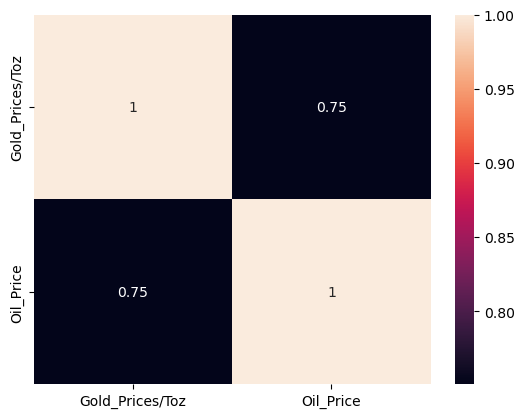

In [107]:
# Cek korelasi antara X dan y
import seaborn as sns
data = pd.concat([train_y, train_X1], axis=1)
sns.heatmap(data.corr(), annot=True)


<Axes: >

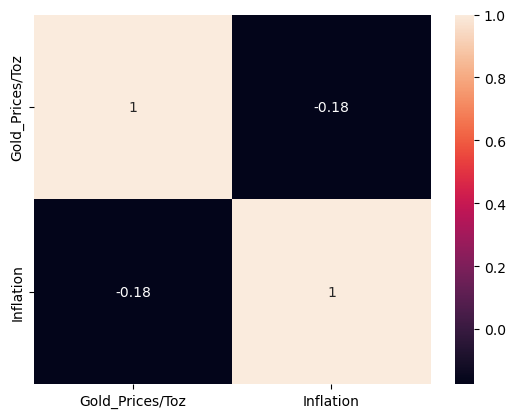

In [108]:
data = pd.concat([train_y, train_X2], axis=1)
sns.heatmap(data.corr(), annot=True)

<Axes: >

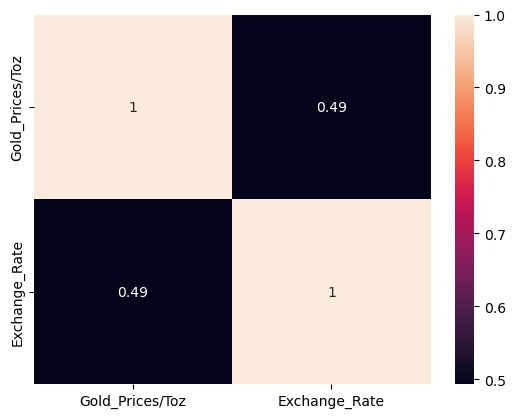

In [109]:
data = pd.concat([train_y, train_X3], axis=1)
sns.heatmap(data.corr(), annot=True)

<Axes: >

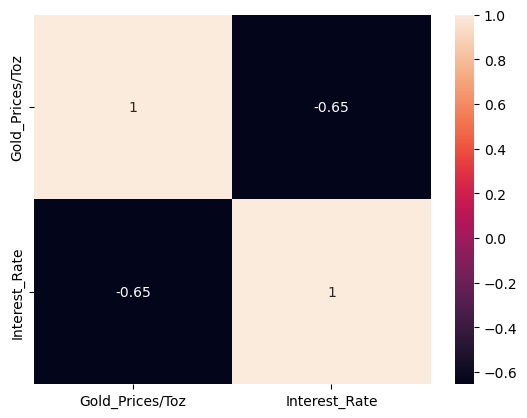

In [110]:
data = pd.concat([train_y, train_X4], axis=1)
sns.heatmap(data.corr(), annot=True)

In [111]:
def evaluate_model(model, test_y, test_X):
    forecast = model.predict(n_periods=len(test_y), exogenous=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'{model.__class__.__name__} Forecast')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    return forecast

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


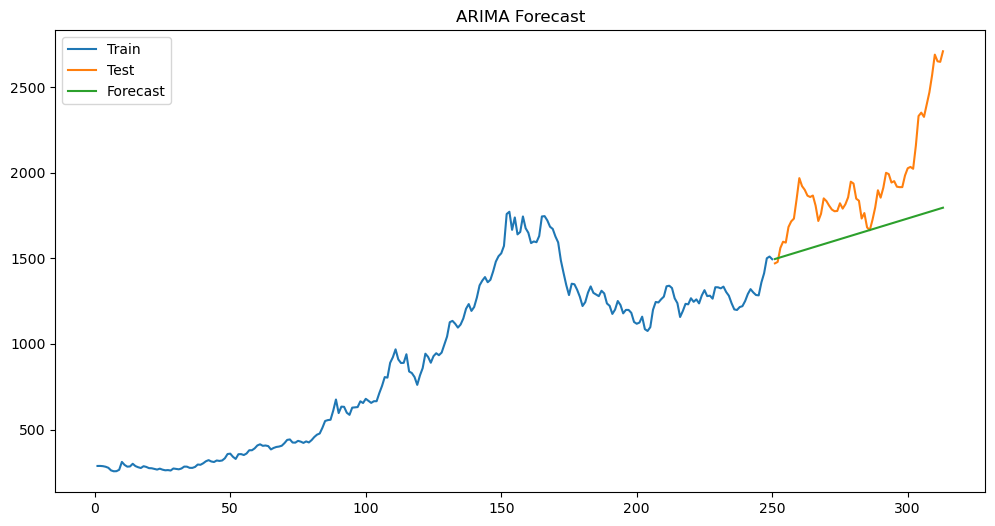

MAE: 293.17
RMSE: 367.22


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


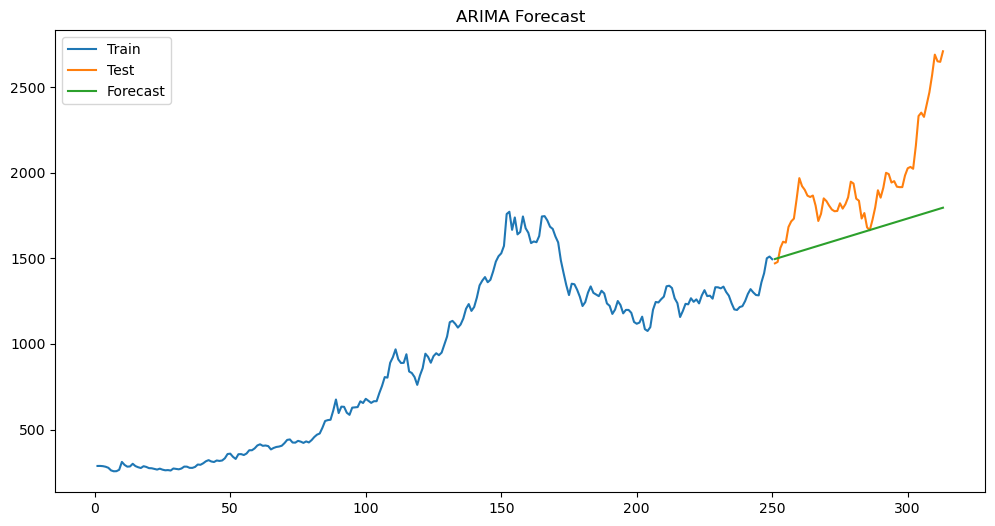

MAE: 293.17
RMSE: 367.22


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


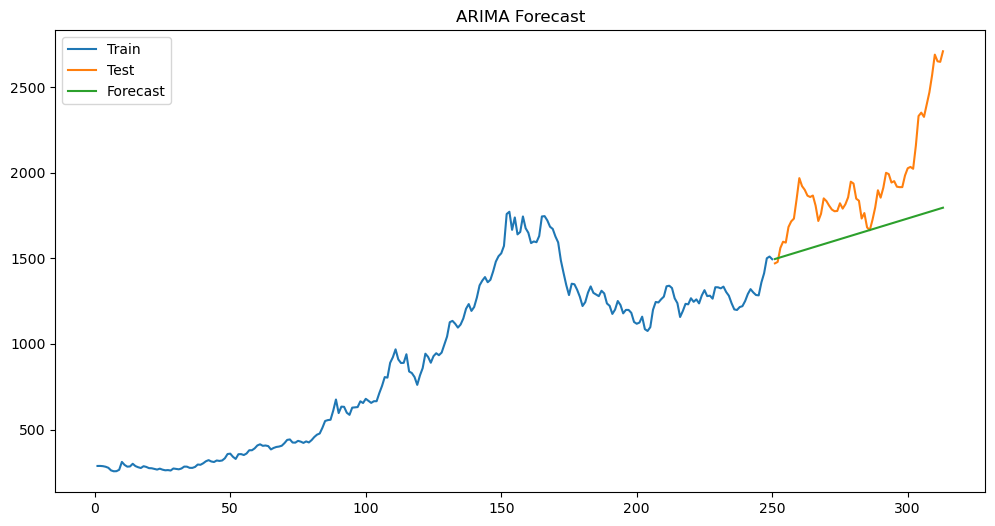

MAE: 293.17
RMSE: 367.22


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


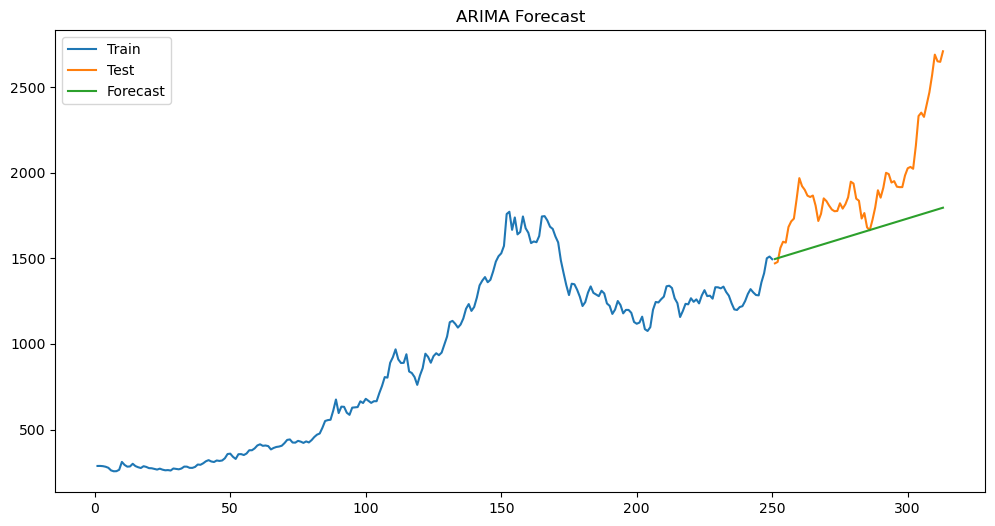

MAE: 293.17
RMSE: 367.22


In [112]:
# Evaluasi ARIMAX
arimax_forecast = evaluate_model(model_arimax, test_y, test_X1)
arimax_forecast = evaluate_model(model_arimax, test_y, test_X2)
arimax_forecast = evaluate_model(model_arimax, test_y, test_X3)
arimax_forecast = evaluate_model(model_arimax, test_y, test_X4)

In [113]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X1, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [114]:
def evaluate_xgboost(model, X_train, y_train, X_test, y_test):
    # Melakukan prediksi dengan model
    y_pred = model.predict(X_test)

    # Visualisasi hasil
    plt.figure(figsize=(12,6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()
    
    # Menghitung metrik evaluasi
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print("Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    return y_pred


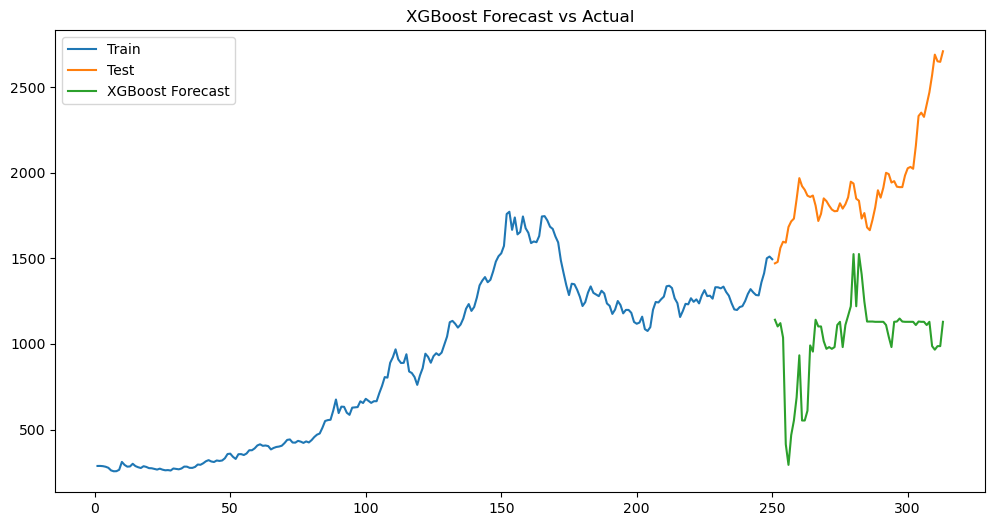

Evaluation Metrics:
MAE: 902.42
MSE: 934902.18
RMSE: 966.90
R2 Score: -10.35


In [115]:
# Evaluasi XGBoost
XGBooost_forecast = evaluate_xgboost(model_XGBoost, train_X1, train_y, test_X1, test_y)

In [116]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X2, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

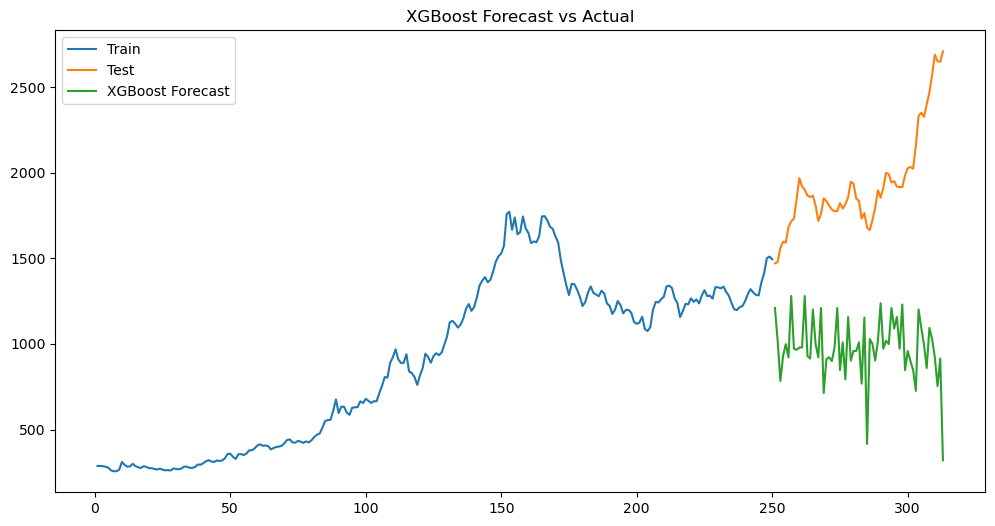

Evaluation Metrics:
MAE: 962.93
MSE: 1061081.74
RMSE: 1030.09
R2 Score: -11.88


In [117]:
# Evaluasi XGBoost
XGBooost_forecast = evaluate_xgboost(model_XGBoost, train_X2, train_y, test_X2, test_y)

In [118]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X3, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

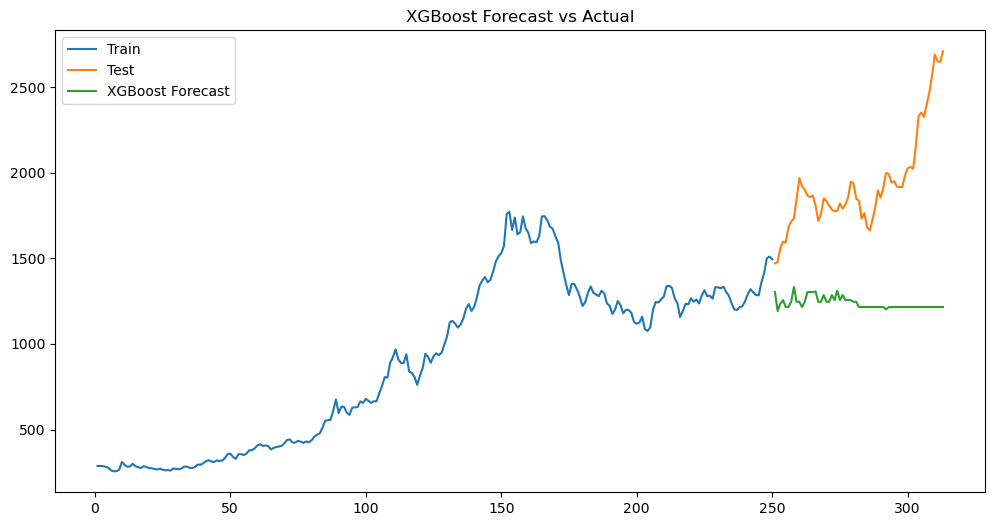

Evaluation Metrics:
MAE: 699.90
MSE: 579667.64
RMSE: 761.36
R2 Score: -6.04


In [119]:
# Evaluasi XGBoost
XGBooost_forecast = evaluate_xgboost(model_XGBoost, train_X3, train_y, test_X3, test_y)

In [120]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X4, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

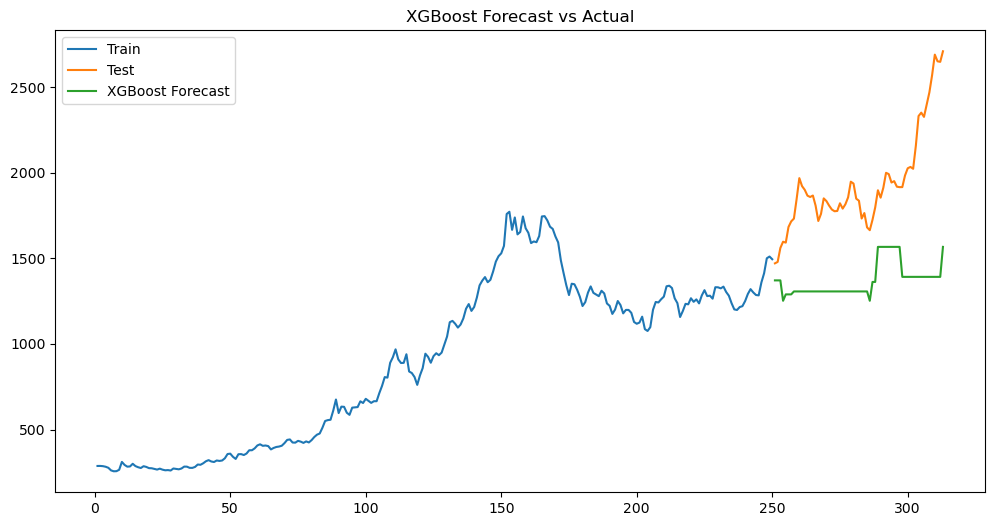

Evaluation Metrics:
MAE: 567.05
MSE: 393668.47
RMSE: 627.43
R2 Score: -3.78


In [121]:
# Evaluasi XGBoost
XGBooost_forecast = evaluate_xgboost(model_XGBoost, train_X4, train_y, test_X4, test_y)